In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyvm.classes.videoclass import Videos
import os
import numpy as np
from pythonlib.tools.expttools import writeStringsToFile
from pyvm.globals import BASEDIR, CB_DIR
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def extract_save_easywand_pts_tovariable(V, list_part =None, indgrp = 0):
    _, framenums, _ = V.goodframes_mapping_new_old_index(0)
    indtrial = V.inds_trials()[0]
    #Pass list to this function to extract a matrix of pts
    vals, columns = V.dlc_extract_pts_matrix(indtrial, list_part, framenums)
    cameras = [c[1] for c in columns]
    return vals,columns,framenums

In [4]:
date = '221002'
expt = 'grammardircolor3c_wandgrid'
animal = 'Pancho'
V = Videos()
V.load_data_wrapper(date=date,expt=expt,animal=animal, condition="wand")
V.import_dlc_data()

[1, 1]
<class 'list'>
/data3/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand
SEARCHIG:  /data3/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand
Searching using this string:
/data3/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand/Camera1/*vid*.mp4
Found this many paths:
0
Searching using this string:
/data3/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand/Camera1/*vid*.avi
Found this many paths:
0
Searching using this string:
/data3/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand/fly2/*vid*.mp4
Found this many paths:
2
---
/data3/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand/fly2/fly2-vid-t1-downsampled.mp4
---
/data3/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand/fly2/vid-t1.mp4
Searching using this string:
/data3/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand/fly2/*vid*.avi
Found this many paths:
0
Searching using this string:
/data3/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand/fly2/*fly2*.avi
Found t

In [5]:
# 1) Extract uniformly all frames, same across all cameras.
V.sample_and_extract_auto_good_frames(ntoget=5000)

# 2) Prune, but only keeping those passing DLC threshold for likeli.
V.filter_good_frames_dan()

vals,cols,fnums = extract_save_easywand_pts_tovariable(V)



Good! good_frames assigned to video ('fly2', 0, 'vid-t1')
Good! good_frames assigned to video ('fly1', 1, 'vid-t1')
Good! good_frames assigned to video ('flea', 2, 'vid-t1')
Good! good_frames assigned to video ('bfs1', 3, 'vid-t1')
DELETED these vides froms self.DatVideos since no good frames found:
[]
Made self.DatGroups!, with len:
*** ('fly1', 1)
*** ('bfs1', 3)
*** ('fly2', 0)
*** ('flea', 2)
1
/data3/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand/fly1/collected_frames
/data3/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand/fly1/vid-t1.mp4-frames
/data3/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand/bfs1/collected_frames
/data3/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand/bfs1/vid-t1.mp4-frames
/data3/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand/fly2/collected_frames
/data3/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand/fly2/vid-t1.mp4-frames
/data3/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand/flea/collected_

In [10]:
print(vals)

[[653.10040283 125.13887685 613.49771118 ... 205.29858569 384.40841064
  517.44425036]
 [584.1249939  157.5567502  439.16000977 ... 162.96595007 371.03838562
  439.50542017]
 [532.87728882 160.80523994 367.46658325 ... 162.96595007 379.24502686
  558.20847344]
 ...
 [406.91939392 211.52282382 301.9230011  ... 328.74477573 505.52215637
  765.33642326]
 [249.43688965 304.51907297 210.9721344  ... 384.69866559 563.93958069
  765.33642326]
 [321.84624023 304.51907297 210.9721344  ... 445.00184386 448.79580322
  691.72307909]]


In [11]:
# df = pd.DataFrame(vals)
# df.columns=cols
# df['frames'] = fnums

# df = df[df.columns.drop(list(df.filter(regex='bfs2')))]
# df.head()

# print(cols)

# df = pd.DataFrame(data=(vals,fnums), columns=cols)
df = pd.read_csv('/home/danhan/Documents/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand/wand_calibration/wandPointsNoScreen.csv')
df_new = pd.read_csv('/home/danhan/Documents/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand/wand_calibration/wandPointsscreen.csv')
df.columns=cols

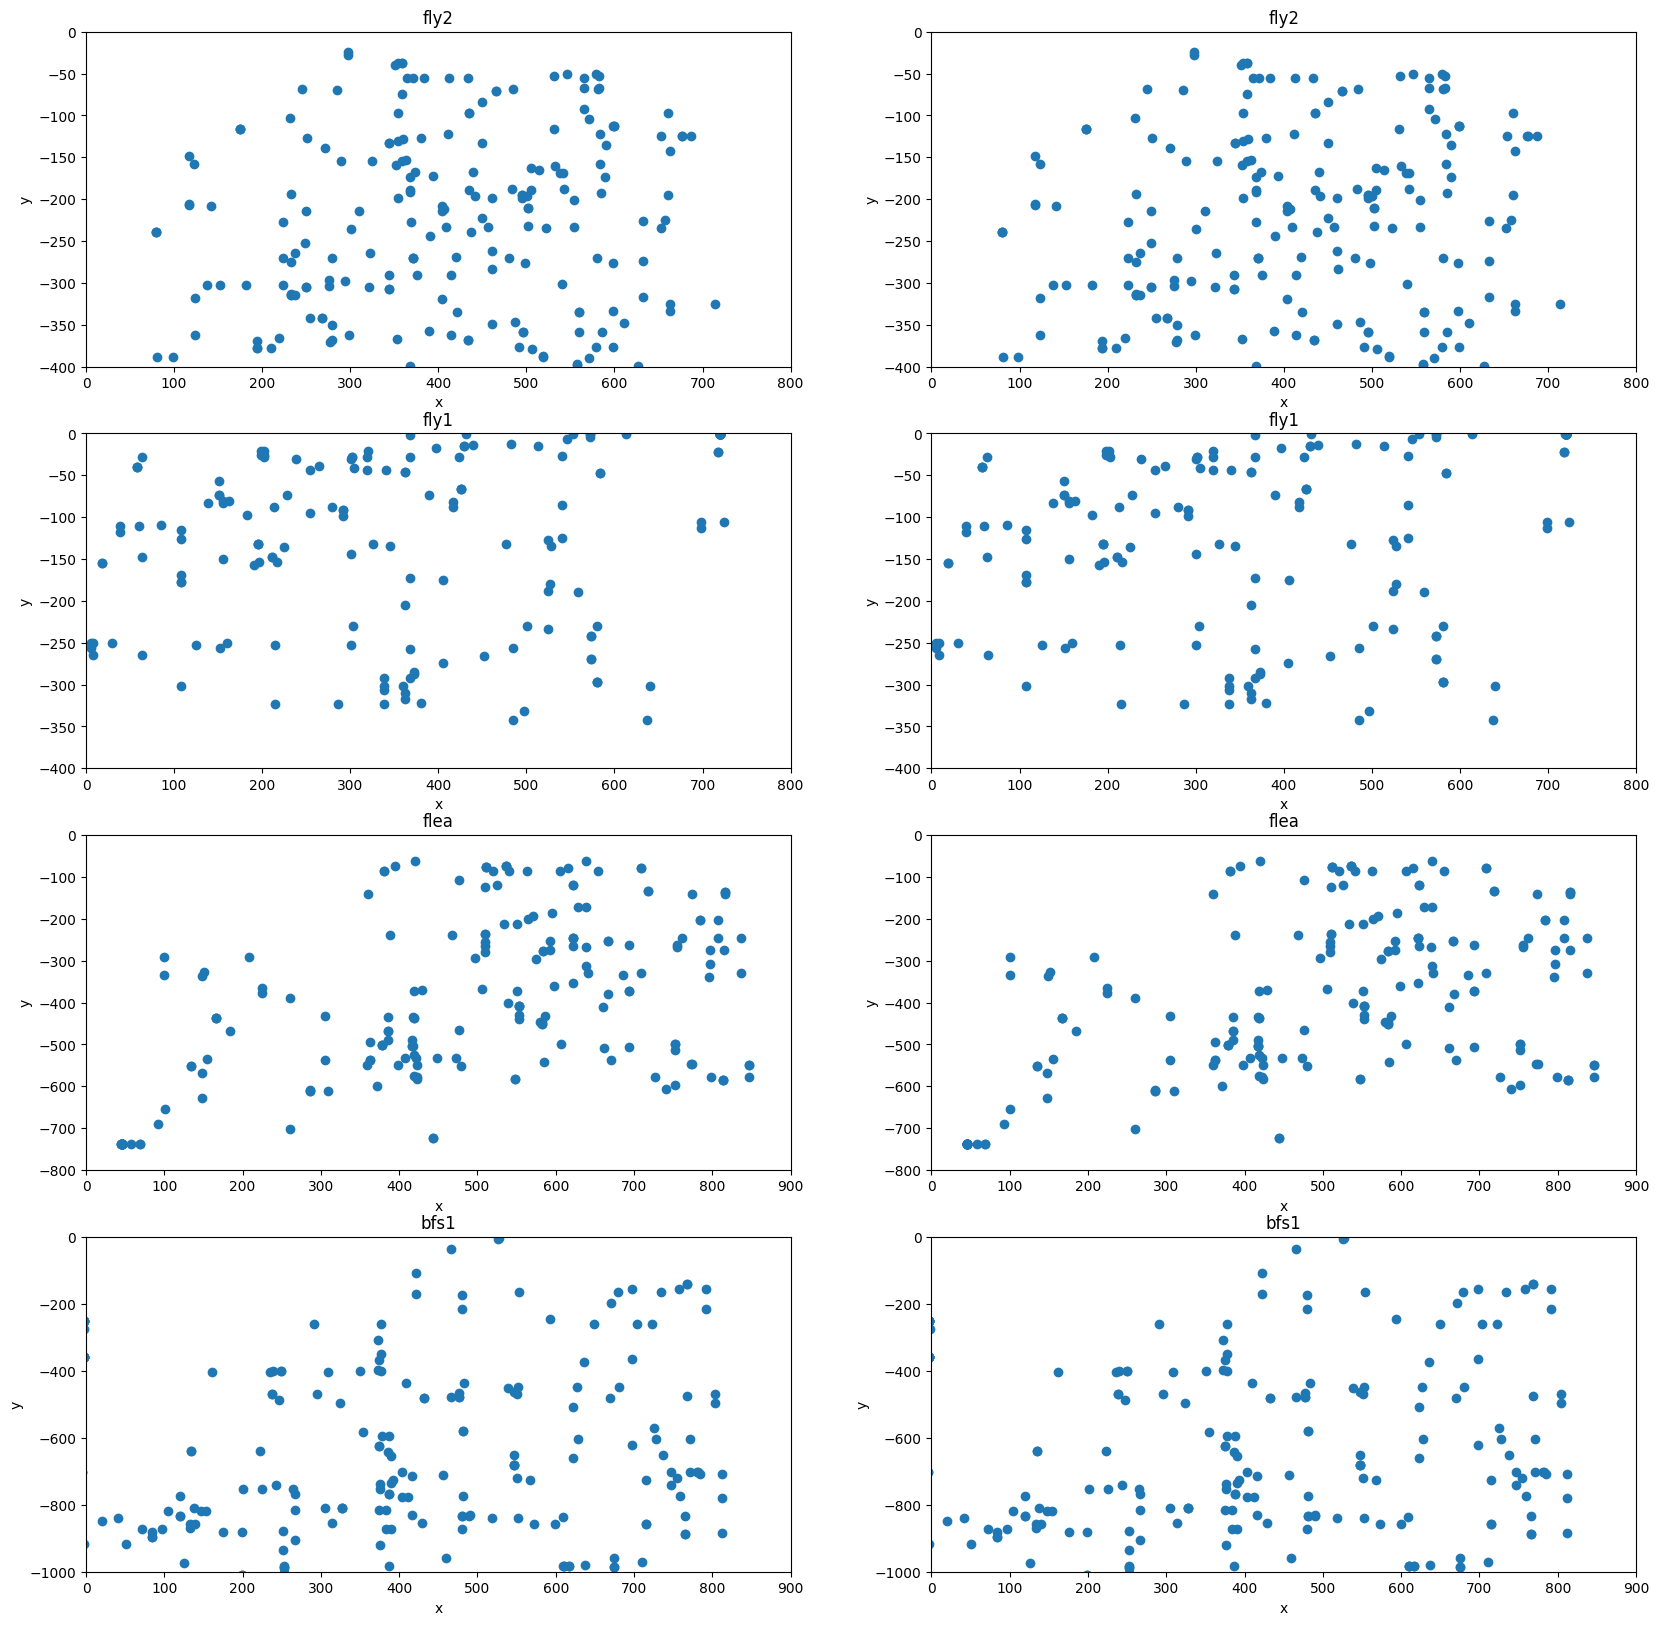

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

xlims=[(0,800),(0,800),(0,900),(0,900)]
ylims=[(-400,0),(-400,0),(-800,0),(-1000,0)]
ylims2 = [(p[1],-p[0]) for p in ylims]

for i in range(0,int(np.floor(len(df.columns)/2)),2):
    axes[int(i/2),0].scatter(df.iloc[:,i],-df.iloc[:,i+1])
    axes[int(i/2),0].set_xlabel('x')
    axes[int(i/2),0].set_ylabel('y')
    axes[int(i/2),0].set_title(df.columns[i][1])
    axes[int(i/2),0].set_xlim(xlims[int(i/2)])
    axes[int(i/2),0].set_ylim(ylims[int(i/2)])
    axes[int(i/2),1].scatter(df_new.iloc[:,i],-df_new.iloc[:,i+1])
    axes[int(i/2),1].set_xlabel('x')
    axes[int(i/2),1].set_ylabel('y')
    axes[int(i/2),1].set_title(df.columns[i][1])
    axes[int(i/2),1].set_xlim(xlims[int(i/2)])
    axes[int(i/2),1].set_ylim(ylims[int(i/2)])
    

In [8]:
# A = [1,2,3,4,5,6,7,8,9]
# B = [2,4,6,8,10,12,14,16,18]
# C = [0,0,0,0,1,1,1,1,1]
# cols = ['A','B','C']

# df = pd.DataFrame([A,B,C]).T
# df.columns = cols
# new_df = df[(df['A']>4) & (df['B']>8)]
# new_df.head()

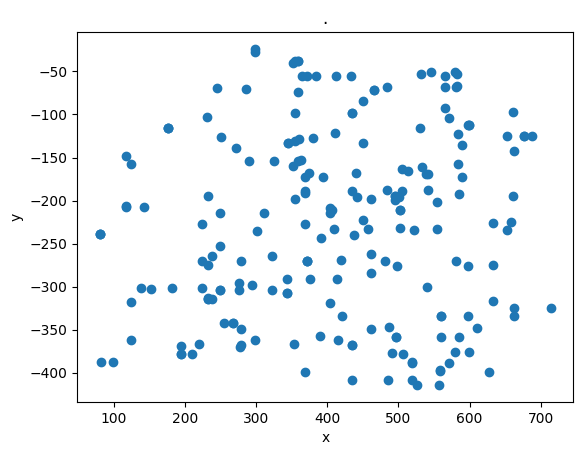

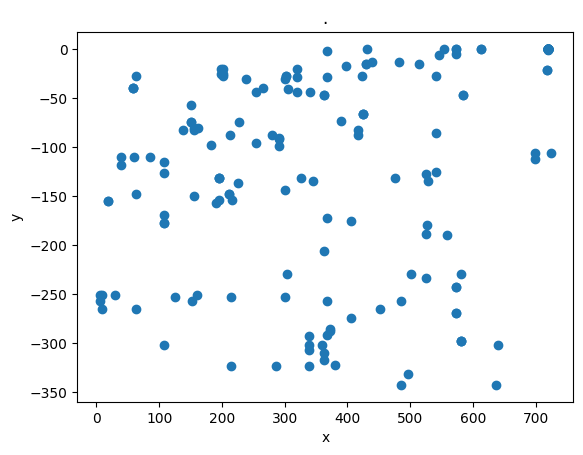

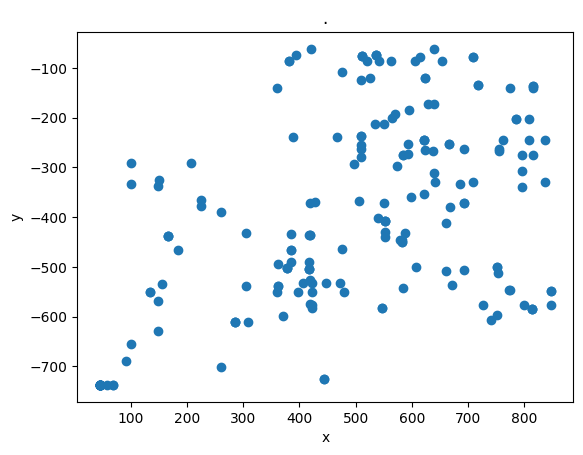

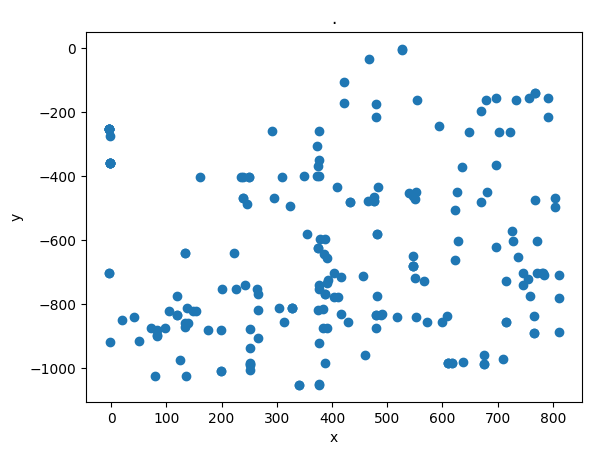

In [9]:
df = pd.read_csv('/home/danhan/Documents/hand_track/Pancho/221002_grammardircolor3c_wandgrid/wand/wand_calibration/wandPointsscreen.csv')
for i in range(0,int(np.floor(len(df.columns)/2)),2):
    plt.scatter(df.iloc[:,i],-df.iloc[:,i+1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(df.columns[i][1])
    plt.show()
